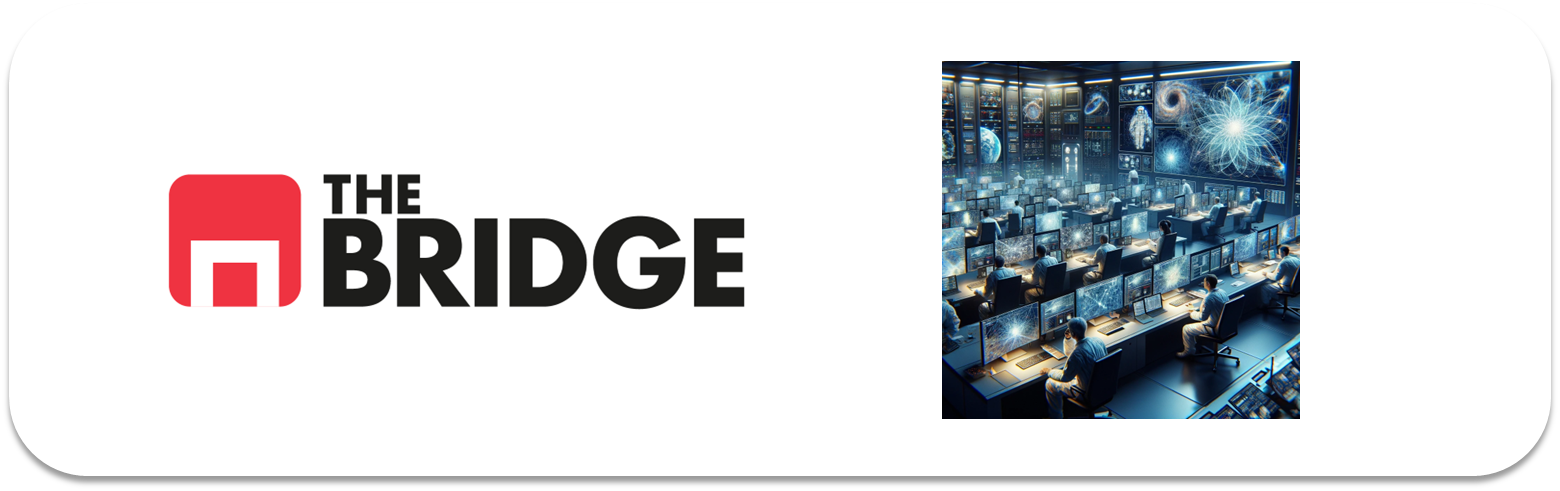

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import bootcampviztools as bt
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random

# Correcciones importantes:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization  # 1. "Flatter" -> Flatten
                                                                                                                    # 2. Usar tensorflow.keras
from sklearn.metrics import classification_report, ConfusionMatrixDisplay  # 3. sklearn_metrics -> sklearn.metrics
from sklearn.model_selection import train_test_split
from skimage.io import imread  # 4. "inmead" -> imread
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from time import time

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



Carga de datos

In [3]:
def read_data(directorios, reshape_dim = (32,32)):
    X = []
    y = []
    mapa_imagen_fichero = []
    directorios = directorios if isinstance(directorios, list) else [directorios] if isinstance(directorios_str) else []
    for directorio in directorios:
        for file in os.listdir(directorio):
            image = imread('/'.join((directorio, file)))
            image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32
            X.append(image)
            y.append(file.split('.')[0]) # El nombre es la clase
            mapa_imagen_fichero.append(file) # Esto para ver la imagen al completo con su resolución

    return np.array(X),np.array(y),mapa_imagen_fichero

In [4]:
PATH_DATA = "./data/"
# Corrección: Incluir el índice 'i' en el nombre del directorio
directorios = [f"{PATH_DATA}github_train_{i}" for i in range(0,4)]



X_train, y_train, train_map = read_data(directorios)

In [5]:
directorios = [PATH_DATA + "github_test"]
X_test, y_test, test_map = read_data(directorios)

Visualización de datos

In [6]:
X_train

array([[[[126, 100,  64],
         [118,  92,  53],
         [129, 104,  63],
         ...,
         [ 88,  69,  45],
         [ 98,  40,  25],
         [121,  72,  50]],

        [[113,  92,  61],
         [122, 102,  68],
         [131, 111,  75],
         ...,
         [131,  75,  57],
         [ 99,  53,  23],
         [ 99,  42,  22]],

        [[120,  96,  64],
         [133, 110,  74],
         [126, 103,  63],
         ...,
         [ 79,  25,  12],
         [ 50,  12,   2],
         [ 79,  32,   6]],

        ...,

        [[ 15,  15,  10],
         [ 82,  79,  69],
         [ 73,  67,  51],
         ...,
         [103,  95,  69],
         [ 83,  75,  53],
         [ 98,  92,  60]],

        [[ 97,  99,  88],
         [ 66,  63,  49],
         [ 80,  69,  51],
         ...,
         [ 70,  61,  39],
         [ 88,  79,  61],
         [100,  92,  68]],

        [[ 63,  55,  44],
         [ 64,  55,  39],
         [ 82,  71,  50],
         ...,
         [ 86,  72,  46],
        

In [7]:
X_train.shape

(4000, 32, 32, 3)

In [8]:
# Train: 4000 imagenes, de 32x32 y en color, 3 canales

In [9]:
type(X_train[123])

numpy.ndarray

In [10]:
X_test.shape

(1000, 32, 32, 3)

In [11]:
def show_images_batch(pets, names=[], n_cols=5, size_scale=2):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, pet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(pet, cmap="Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

In [12]:
def show_images_files(pets, names = [], n_cols = 5, size_scale = 2, train = True, indice = 0):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, filepet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        if train:
            pet = imread(PATH_DATA + f"github_train_{indice}/" + filepet)
        else:
            pet = imread(PATH_DATA + "github_test/" + filepet)
        plt.imshow(pet, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

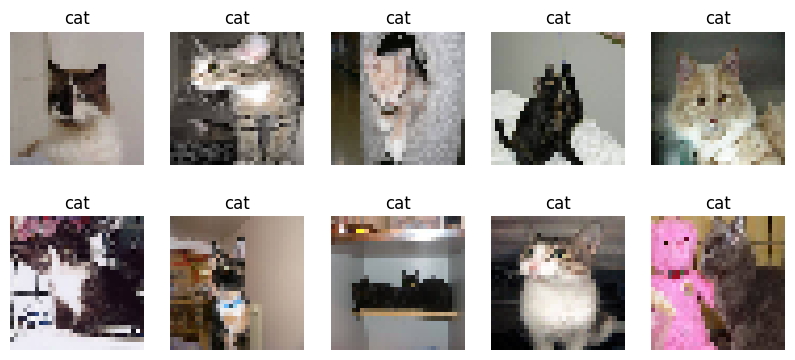

In [13]:
indices = np.random.randint(100,300,10)
show_images_batch(X_train[indices], names= y_train[indices])

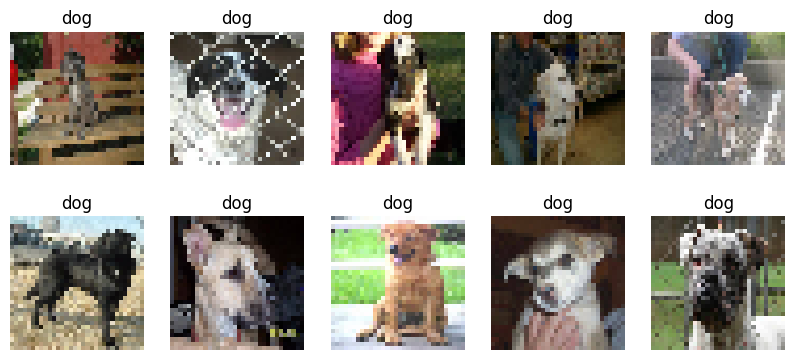

In [14]:
indices = np.random.randint(2000,2300,10)
show_images_batch(X_train[indices], names= y_train[indices])

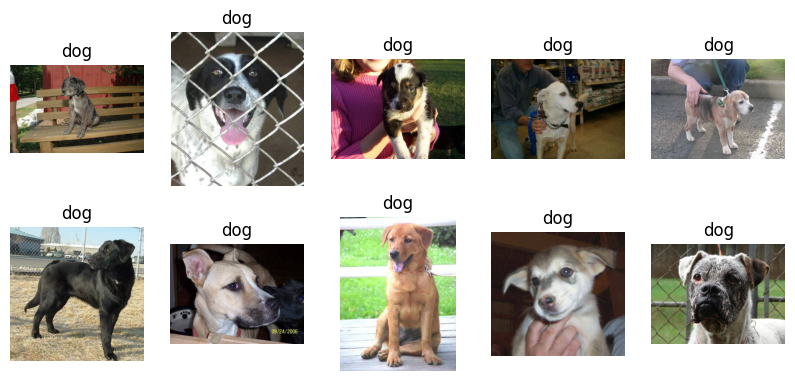

In [15]:
show_images_files([train_map[i] for i in indices], names= y_train[indices], train=2, indice=2)

MINIEDA

In [16]:
pd.Series(y_train).value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

Escalado

In [17]:
X_train = X_train/255
X_test = X_test/255

In [19]:
# SUFFLE...(optativo)
def aplana_escala_gris(array_in, grises = True):
    def convertir_a_escala_de_grises(imagen_color):
        coefficients = np.array([0.2989, 0.5870, 0.1140])
        imagen_gris = np.dot(imagen_color[...,:3], coefficients)
        return imagen_gris

    if array_in.shape[-1] == 3 and grises:
        array_in = np.array([convertir_a_escala_de_grises(imagen) for imagen in array_in])
        return array_in.reshape(array_in.shape[0],-1)



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_train_rf = aplana_escala_gris(X_train)
len(X_train_rf[0])

1024

In [23]:
from sklearn.utils import shuffle

x_train_rf_shuffled, y_train_shuffled = shuffle(X_train_rf, y_train, random_state=42)

y_train[0:10]


array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat'], dtype='<U3')

In [22]:

y_train_shuffled[0:10]

array(['cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat',
       'cat'], dtype='<U3')

In [24]:
rf_clf = RandomForestClassifier()
np.mean(cross_val_score(rf_clf, x_train_rf_shuffled, y_train_shuffled, cv = 5, scoring = "accuracy"))


np.float64(0.5967499999999999)

# EXTRA-Tool: Save data

Podemos guardar los arrays de numpy en un archivo .npz, de tal manera que luego sea más rápido importarlo

In [27]:

np.savez(PATH_DATA + 'data.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Para cargar

# data = np.load(PATH_DATA + 'data.npz')
# X_train = data['X_train']
# X_test = data['X_test']
# y_train = data['y_train']
# y_test = data['y_test']



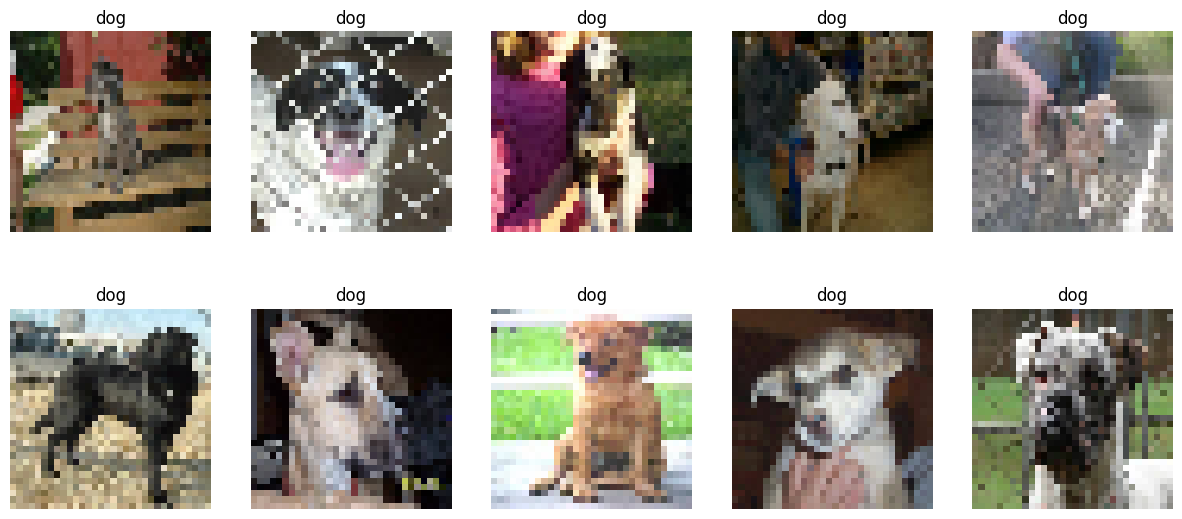

In [28]:
show_images_batch(X_train[indices], y_train[indices], size_scale = 3)

#2

A la hora de crear un modelo DL, recuerda que necesitamos fijar una serie de hiperparámetros de partida, no es como cuando instanciamos nuestros modelos en Sklearn que ya vienen "preconfigurados". El orden en este caso suele ser:

1. Topología (I): Capas, conexión entre capas, vamos a hacer expansión-reducción de features, reducción-expansión, prismas, aplanamiento, dropout, etc  
2. Topología (II): Hiperparámetros por capa: unidades para las densas, kernel, strides, filtros, padding para convolucionales y pooling, drop-out rate para drop-out, etc  
3. Otros hiperparámetros: Tipo de optimizador (y sus hiperparámetros, en general usaremos los por defecto, salvo en ocasiones el learning rate), tamaño del batch (aunque en general será 32 y dependerá del tamaño del dataset de train), épocas de entrenamiento, % del conjunto de validación.  
4. Métrica y función de pérdida  
5. Uso de calibacks (en Keras): En general usaremos o EarlyStopping y/o ModelCheckpoint, pero aquí tienes unas cuantas más de las estándar de Keras  

Vamos a crear una topología parecida a la de la figura

# Con los siguientes hiperparámetros:

## Primer juego Conv-Pooling:
- Conv -> kernel de 3x3, stride = (1,1), padding = "same", activation = "relu", numero de filtros = 64  
- Pooling -> max, kernel 2x2, stride = (2,2) -> Vamos a reducir en 2x2, 4 el número de features  
- Features de salida: \(16 \times 16 \times 64 = 16384\)

---

## Capa Dropout: 0.25 de ratio

### Segundo juego con Conv-Pooling: Aplicamos expansión, aumentando el número de filtros, pensamos en buscar más características de características
- Conv -> kernel de 3x3, stride = (1,1), padding = "same", activation = "relu", numero de filtros = 128  
- Pooling -> max, kernel 2x2, stride = (2,2) -> Vamos a reducir en 2x2, 4 el número de features  
- Features de salida \(8 \times 8 \times 128 = 8192\)

---

## Capa Dropout: 0.25 de ratio

*Capa aplanadora: Flatten() -> Nos deja cada instancia en un vector de 8192 features  
**Cabeza clasificación:** 1 densa oculta y la de salida. La oculta empezamos con una reducción de 8192 a 512, un factor de 16. Podríamos haberla dejado en 32x32 = 1024 features que es el número que meteríamos en un modelo tradicional  

- **Capa Oculta Densa:** 128 unidades, activación "relu"  
- **Capa densa de salida:** 1 unidad (es clasificador binario), activación "softmax"

In [37]:
layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', padding="same", input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding= "same"),
    keras.layers.Dropout(rate= 0.25),  

    keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),  

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(1, activation='sigmoid')
]

model = keras.Sequential(layers)

c:\Users\iagog\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Otros hiperparametros

In [38]:
X_train.size

12288000

In [39]:
optimizer = keras.optimizers.Adam()

In [41]:
metrics = ["accuracy"] # datset equilibrado
loss = "binary_crossentropy" # clasificador binario

In [44]:
batch_size = 32
len(X_train)*0.8/batch_size

100.0

In [45]:
num_epochs = 100

In [46]:
earlyS = keras.callbacks.EarlyStopping(patience=10)

In [49]:
model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,270,977 (16.29 MB)

 Trainable params: 4,270,977 (16.29 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
y_train[np.array([1,2,3560])]

array(['cat', 'cat', 'dog'], dtype='<U3')

In [53]:
y_train_num = np.array([0 if y == "cat" else 1 for y in y_train])

In [55]:
# para poder evaluar los modelos

def prepare_model(resolution = (32,32)):
    layers = [
        keras.layers.Conv2D(64,(3,3), activation = 'relu', padding= "same",input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size = (2,2), padding = "same"),
        keras.layers.Dropout(rate = 0.25),

        keras.layers.Conv2D(128,(3,3), activation = 'relu', padding= "same"),
        keras.layers.MaxPooling2D(pool_size = (2,2), padding = "same"),
        keras.layers.Dropout(rate = 0.25),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(rate = 0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ]

    model = keras.Sequential(layers)
    optimizer = keras.optimizers.Adam()
    metrics = ["accuracy"]
    loss = "binary_crossentropy"
    model.compile(optimizer= optimizer,
                  loss= loss,
                  metrics= metrics)

    return model  

In [56]:
# miramos cuanto tarda en lanzar 1 epoch

model = prepare_model()

t_zero = time()
history = model.fit(X_train,
    y_train_num,
    epochs=1,
    batch_size=batch_size,  # Corrección: eliminar espacio después del =
    callbacks=[earlyS],      # Corrección: sintaxis sin espacios en []
    validation_split=0.2)
dur_epoca = time() - t_zero

c:\Users\iagog\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.6031 - loss: 0.7133 - val_accuracy: 0.0000e+00 - val_loss: 0.7956


In [57]:
print(dur_epoca)

5.460892915725708


In [58]:
# lo usamos con mas epochs
model = prepare_model()

t_zero = time()
history = model.fit(X_train,
    y_train_num,
    epochs=num_epochs,
    batch_size=batch_size,  # Corrección: eliminar espacio después del =
    callbacks=[earlyS],      # Corrección: sintaxis sin espacios en []
    validation_split=0.2)
dur_epoca = time() - t_zero

Epoch 1/100


c:\Users\iagog\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5844 - loss: 0.7925 - val_accuracy: 0.0000e+00 - val_loss: 0.8153
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6208 - loss: 0.6446 - val_accuracy: 0.6562 - val_loss: 0.6788
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6700 - loss: 0.6061 - val_accuracy: 0.1075 - val_loss: 1.2050
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7027 - loss: 0.5772 - val_accuracy: 0.6250 - val_loss: 0.5832
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7197 - loss: 0.5494 - val_accuracy: 0.5575 - val_loss: 0.6329
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7304 - loss: 0.5290 - val_accuracy: 0.6075 - val_loss: 0.6677
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7397 - loss: 0.5146 - val_accuracy: 0.5000 - val_loss: 0.7649
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7768 - loss: 0.4854 - val_accu

In [ ]:
y_test_num = np.array([0 if y == "cat" else 1 for y in y_test])

model.evaluate(X_test, y_test_num) 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7889 - loss: 0.5596


[0.6477906107902527, 0.7639999985694885]

In [60]:
from sklearn.utils import shuffle  # Descomentado para que funcione

X_s, y_s = shuffle(X_train, y_train_num)

model = prepare_model()
t_zero = time()
history_shuffle = model.fit(X_s,
    y_s,
    epochs=num_epochs,
    batch_size=batch_size,
    callbacks=[earlyS],
    validation_split=0.2)
dur_epoca = time() - t_zero

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5033 - loss: 0.7693 - val_accuracy: 0.4988 - val_loss: 0.6937
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.5626 - loss: 0.6789 - val_accuracy: 0.6425 - val_loss: 0.6342
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6660 - loss: 0.6288 - val_accuracy: 0.6675 - val_loss: 0.6192
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6812 - loss: 0.6032 - val_accuracy: 0.7088 - val_loss: 0.5767
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7013 - loss: 0.5693 - val_accuracy: 0.6800 - val_loss: 0.6001
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7094 - loss: 0.5692 - val_accuracy: 0.7275 - val_loss: 0.5500
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7296 - loss: 0.5272 - val_accuracy: 0.7200 - val_loss: 0.5570
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7649 - loss: 0.5042 - 

In [61]:
y_test_num = np.array([0 if y == "cat" else 1 for y in y_test])

model.evaluate(X_test, y_test_num) 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7162 - loss: 0.6720


[0.6747357845306396, 0.7250000238418579]

<Axes: >

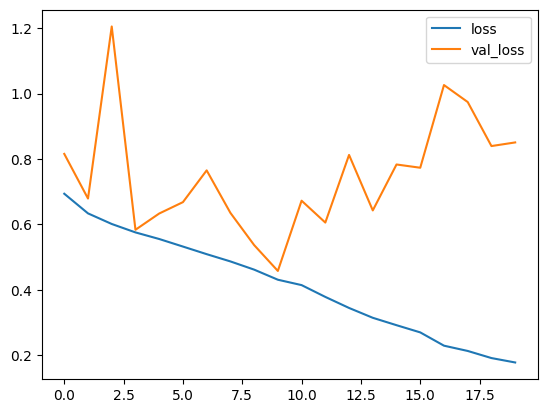

In [65]:
df_evol = pd.DataFrame(history.history)
df_evol_shuffle = pd.DataFrame(history_shuffle.history)


df_evol[["loss", "val_loss"]].plot()

<Axes: >

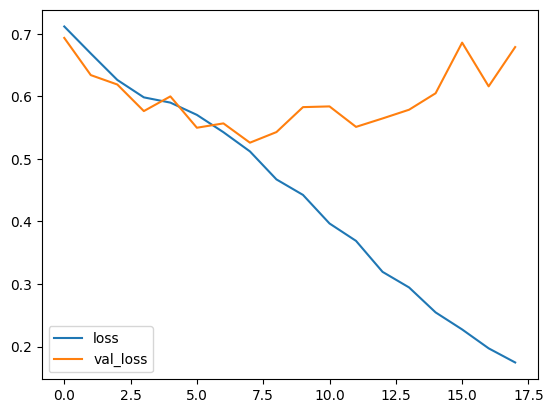

In [66]:
df_evol_shuffle[["loss", "val_loss"]].plot()

In [67]:
predictions = model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [68]:
y_pred = ["dog" if prediction[0] > 0.5 else "cat" for prediction in model.predict(X_test)]
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

         cat       0.73      0.70      0.72       500
         dog       0.72      0.75      0.73       500

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.72      0.72      1000



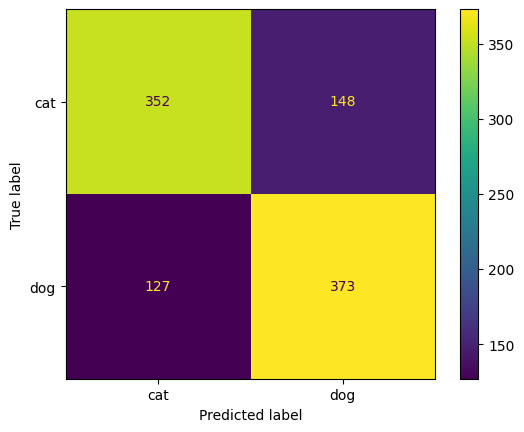

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [70]:
confianza = [ (1-prediction[0]) if prediction[0] <= 0.5 else prediction[0] for prediction in model.predict(X_test)]
df_pred = pd.DataFrame({"ficheros": test_map,
                        "True": [file.split(".")[0] for file in test_map],
                        "Prediction": y_pred,
                        "Confianza": confianza})
df_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,ficheros,True,Prediction,Confianza
0,cat.10705.jpg,cat,dog,0.717051
1,cat.10711.jpg,cat,cat,0.662052
2,cat.10714.jpg,cat,cat,0.933685
3,cat.10715.jpg,cat,dog,0.838058
4,cat.10716.jpg,cat,dog,0.990074
...,...,...,...,...
995,dog.9883.jpg,dog,dog,0.931065
996,dog.9884.jpg,dog,dog,0.980562
997,dog.9885.jpg,dog,dog,0.722928
998,dog.9889.jpg,dog,dog,0.693744


In [71]:
#...
